In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
from matplotlib.colors import ListedColormap
from matplotlib.animation import FuncAnimation

import TheoreticalModelFunctions as bmf

### Setting parameters

In [2]:
# Set board size
m = 70
n = 70

# Set parameters
a = [1,0.5,0.1] # Affluence group parameters 
p = [0.1, 0.4, 0.5] # Initial affluence proportions 
v = 5 # Initial house price
weights = [0.75, 0.75] # Inflationary parameter and amenities parameter
empty_ratio = 0.15 # Proportion of grid empty
amenities = m # Number of amenities
r = 4 # Radius to consider amenities in

### Initialization of house prices and affluence distribution

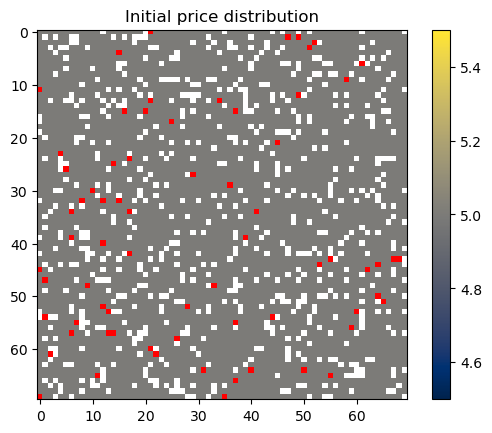

In [13]:
# Initialize house price grid 
initial_prices = bmf.initial_price_dist(m, n, v, amenities, empty_ratio)
# display(initial_prices)
bmf.plot_grid(initial_prices)
plt.title("Initial price distribution")
plt.show()

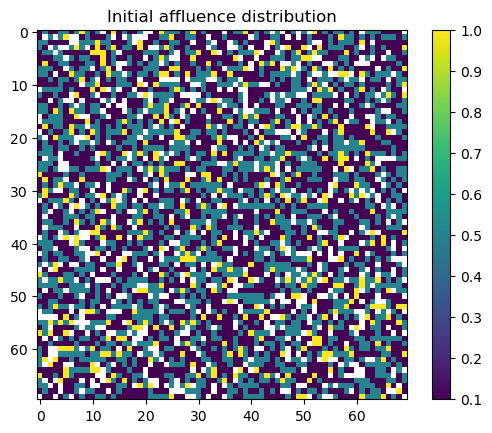

In [14]:
# Initialize affluence grid 
affluence_grid = bmf.initial_affluence_dist(initial_prices, a, p)
# display(affluence_grid)

# Separate plotting mechanism - does not do well with color map defined for house value grid 
plt.figure()
plt.imshow(affluence_grid, cmap='viridis', interpolation='nearest') 
plt.colorbar()
plt.title("Initial affluence distribution")

plt.show()

### Updating house prices for the first time using the initial prices and affluence grid

Testing first house values calculation:


array([[ 3.85  ,  4.25  ,  3.85  , ...,  3.85  ,  3.85  ,     nan],
       [ 3.85  ,     nan,  4.25  , ...,  4.25  ,  3.85  ,  4.25  ],
       [ 4.25  ,  4.25  ,  3.85  , ...,  3.85  ,  3.85  ,  3.85  ],
       ...,
       [ 4.8125,  4.625 ,     nan, ...,  3.85  ,     nan,  3.85  ],
       [ 4.6   ,  4.8125,  4.225 , ...,     nan,  4.75  ,  3.85  ],
       [-1.    ,  4.6   ,  4.4125, ...,  4.25  ,  3.85  ,     nan]])

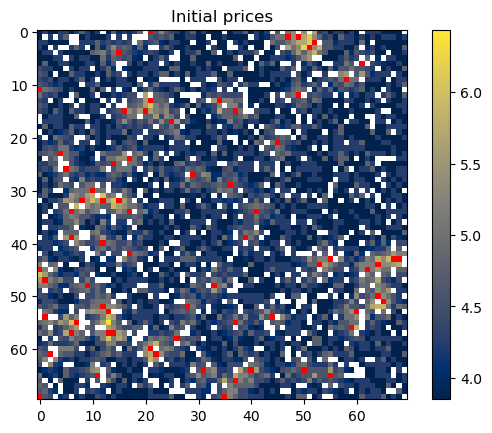

In [15]:
# Test the new functions
house_vals = bmf.update_house_prices(initial_prices, affluence_grid, weights, r) 
print("Testing first house values calculation:")
display(house_vals)
# Plot the initial house values 
fig, ax = plt.subplots()
img = bmf.plot_grid(house_vals)
plt.title(f"Initial prices")
plt.show()

### Animation - no adding new houses or modifying house prices

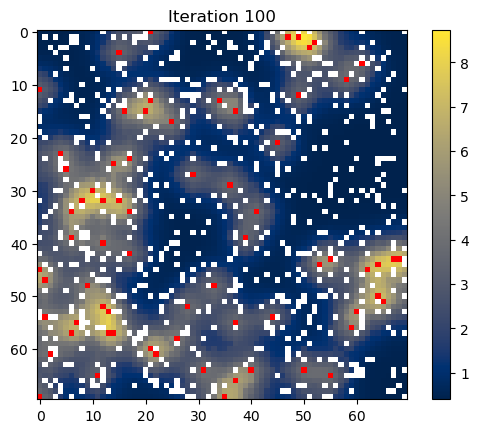

In [16]:
# Animation cell 

# Plot the initial house values 
fig, ax = plt.subplots()
img = bmf.plot_grid(house_vals)
plt.title(f"Initial prices")
plt.pause(0.5) 
clear_output(wait=True) 

# Plot the iterations 
n_steps = 100
for i in range(n_steps):
   house_vals, affluence_grid = bmf.new_iteration(house_vals, affluence_grid, weights, r)
   img = bmf.plot_grid(house_vals)  
   plt.title(f"Iteration {i + 1}")
   plt.pause(0.001)  
   clear_output(wait=True) 

### Animation - adding new houses to fill up 60% of empty space (iteration 25) and modifying prices of 1000 houses (iteration 50) 

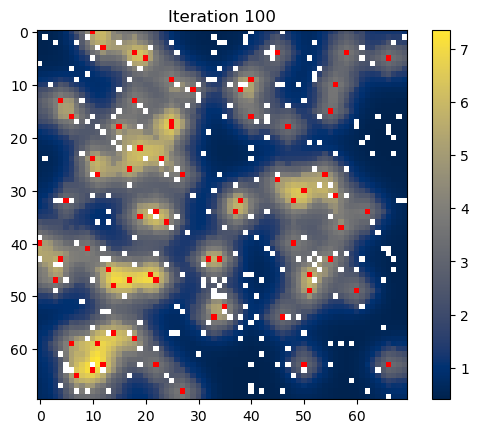

In [17]:
# Implementing adding houses and modifying houses functions

# Initialize house price grid 
initial_prices = bmf.initial_price_dist(m, n, v, amenities, empty_ratio)

# Initialize affluence grid 
affluence_grid = bmf.initial_affluence_dist(initial_prices, a, p)

house_vals = bmf.update_house_prices(initial_prices, affluence_grid, weights, r) 

# Plot the initial house values 
fig, ax = plt.subplots()
img = bmf.plot_grid(house_vals)
plt.title(f"Initial prices")
plt.pause(1) 
clear_output(wait=True) 

# Plot the iterations 
# Add 399 random houses with price 8 at iteration 25 (fills up 60% of empty space)
# Modify 1000 random existing houses to price 10 at iteration 50
n_steps = 100
for i in range(n_steps):
    if i == 25:
        house_vals, affluence_grid = bmf.add_new_houses(
            house_vals, affluence_grid, a, p, num_houses=399, random=True, pos=None, value=8
            )
    if i == 50:
        house_vals = bmf.modify_existing_prices(
            house_vals, num_houses=1000, random=True, pos=None, new_value=10
        )
    house_vals, affluence_grid = bmf.new_iteration(house_vals, affluence_grid, weights, r)
    img = bmf.plot_grid(house_vals)  
    plt.title(f"Iteration {i + 1}")
    plt.pause(0.001)  
    clear_output(wait=True) 

### Calculating segregation index with and without amenities

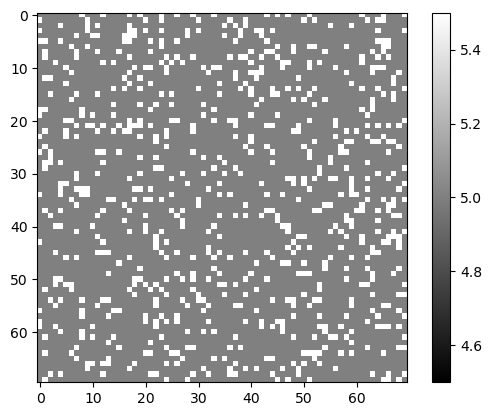

No amenities case - just empty space
Segregation Index at iteration 25 (empty space filled with mean): -1.8501496161759727
Segregation Index at iteration 50 (empty space filled with mean): -2.251116898862211
Segregation Index at iteration 75 (empty space filled with mean): -2.3215357791102407
Segregation Index at iteration 100 (empty space filled with mean): -2.340781567434461


In [ ]:
# Calculating segregation index for a grid with empty space but no amenities
amenities = 0 # Number of amenities

# Initialization
np.random.seed(42) # Set a random seed
initial_prices = bmf.initial_price_dist(m, n, v, amenities, empty_ratio)
affluence_grid = bmf.initial_affluence_dist(initial_prices, a, p)

# Plotting no amenity case (needs separate code since the mask in the plotting function does not work on this)
cmap = plt.cm.gray  
cmap.set_bad(color='white') 
plt.figure()
plt.imshow(initial_prices, cmap=cmap, interpolation='nearest') 
plt.colorbar()
plt.show()

print("No amenities case - just empty space")
# Iterations
house_vals = bmf.update_house_prices(initial_prices, affluence_grid, weights, r) 
n_steps = 100
for i in range(n_steps):
   # Calculate segregation index at iteration 25, 50, 75 and 100
   if i in [24, 49, 74, 99]:
      seg_index_mean = bmf.segregation_index(affluence_grid, fill_with_mean=True)
      print(f"Segregation Index at iteration {i+1} (empty space filled with mean): {seg_index_mean}")
   house_vals, affluence_grid = bmf.new_iteration(house_vals, affluence_grid, weights, r)
   

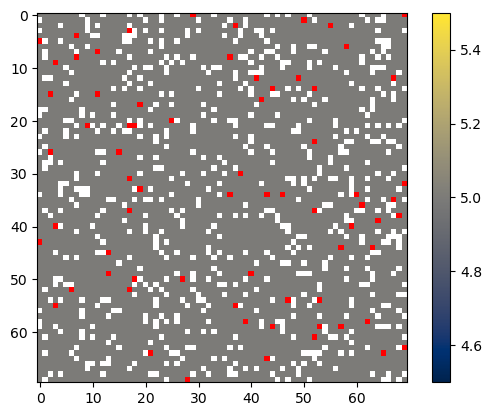

Amenities case with same empty space
Segregation Index at iteration 100 (empty space filled with mean): -2.244722565088426


In [ ]:
# Calculating segregation index for a grid with empty space and amenities
amenities = m 

# Initialization
np.random.seed(42) # Set same random seed to get same empty spaces
initial_prices = bmf.initial_price_dist(m, n, v, amenities, empty_ratio)
affluence_grid = bmf.initial_affluence_dist(initial_prices, a, p)

bmf.plot_grid(initial_prices)
plt.show()

# Iterations
house_vals = bmf.update_house_prices(initial_prices, affluence_grid, weights, r) 
n_steps = 100
for i in range(n_steps):
   house_vals, affluence_grid = bmf.new_iteration(house_vals, affluence_grid, weights, r)
   
# Calculate segregation index
U = affluence_grid

seg_index_mean = bmf.segregation_index(U, fill_with_mean=True)

print("Amenities case with same empty space")
print(f"Segregation Index at iteration 100 (empty space filled with mean): {seg_index_mean}")

### Animation code for exporting to GIF

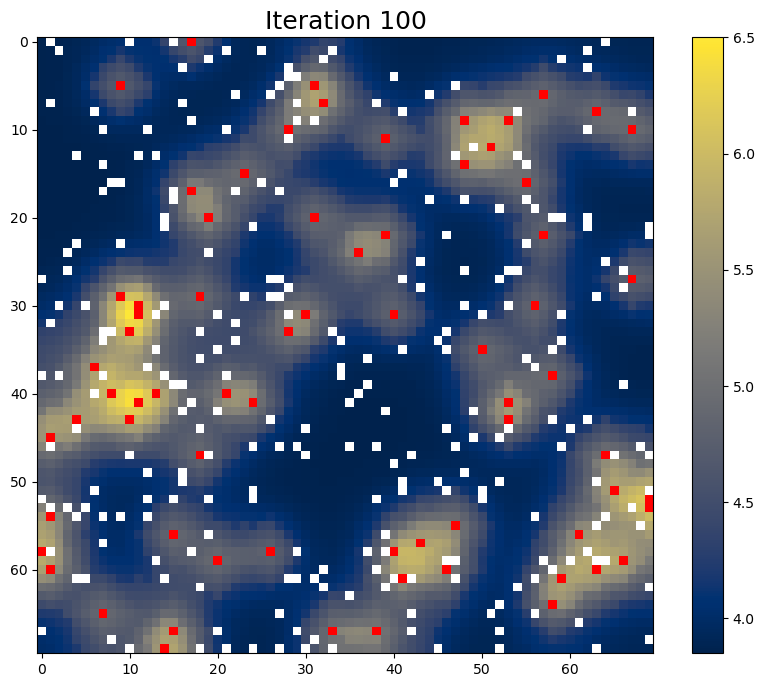

In [7]:
n_steps=101

fig, ax = plt.subplots(figsize=(10, 8))

# Initialize house values and affluence grid
house_vals = bmf.initial_price_dist(m, n, v, amenities, empty_ratio)
affluence_grid = bmf.initial_affluence_dist(house_vals, a, p)
house_vals = bmf.update_house_prices(house_vals, affluence_grid, weights, r) 

# Color map for house prices only
cmap = plt.cm.cividis.copy()
cmap.set_bad(color='white')  # Set white for NaN values

# Init function to set up the initial plot
def init():
    global house_vals, affluence_grid

    # Calculate the minimum and maximum values in the grid, excluding NaN and -1 values (amenities)
    non_empty_values = house_vals[(house_vals != -1)]
    min_value = np.nanmin(non_empty_values)
    max_value = np.nanmax(non_empty_values)

    # Plot house grid using min_value for vmin and max_value for vmax
    ax.imshow(house_vals, cmap=cmap, vmin=min_value, vmax=max_value, interpolation='nearest')

    # Color map for amenities (-1 values set to red)
    new_colours = np.ones((256, 4))  
    new_colours[0] = [1, 0, 0, 1]  # Set -1 to red
    new_colours[1:] = [1, 1, 1, 0]  # All other colors are transparent
    new_cmap = ListedColormap(new_colours)

    # Make a mask for amenities and set them to a different colour
    amenities_mask = house_vals != -1
    ax.imshow(amenities_mask, cmap=new_cmap)

    # Add color bar for house prices
    plt.colorbar(ax.imshow(house_vals, cmap=cmap, vmin=min_value, vmax=max_value, interpolation='nearest'), ax=ax)
    
    ax.set_title("Initial Prices", fontsize=18)

    return []

# Update function for each frame
def update(frame):
    global house_vals, affluence_grid
    
    # Update the house values and affluence grid based on the frame
    if frame == 25:
        house_vals, affluence_grid = bmf.add_new_houses(
            house_vals, affluence_grid, a, p, num_houses=399, random=True, pos=None, value=8
        )
    if frame == 50:
        house_vals = bmf.modify_existing_prices(
            house_vals, num_houses=1000, random=True, pos=None, new_value=10
        )

    house_vals, affluence_grid = bmf.new_iteration(house_vals, affluence_grid, weights, r)

    # Clear the previous frame
    ax.clear()

    # Colour map for house prices only
    cmap = plt.cm.cividis.copy()
    cmap.set_bad(color='white')  # Set white for NaN values

    # Calculate the minimum and maximum values in the grid, excluding NaN and -1 values (amenities)
    non_empty_values = house_vals[(house_vals != -1)]
    min_value = np.nanmin(non_empty_values)
    max_value = np.nanmax(non_empty_values)

    # Plot house grid using min_value for vmin and max_value for vmax
    ax.imshow(house_vals, cmap=cmap, vmin=min_value, vmax=max_value, interpolation='nearest')

    # Colour map for amenities (-1 values set to red)
    new_colours = np.ones((256, 4))  
    new_colours[0] = [1, 0, 0, 1]  # Set -1 to red
    new_colours[1:] = [1, 1, 1, 0]  # All other colors are transparent
    new_cmap = ListedColormap(new_colours)

    # Make a mask for amenities and set them to a different colour
    amenities_mask = house_vals != -1
    ax.imshow(amenities_mask, cmap=new_cmap)

    # Set title for the current frame
    ax.set_title(f"Iteration {frame}", fontsize=18)

    # Return the updated axes object
    return []

# Create the animation
anim = FuncAnimation(fig, update, frames=n_steps, init_func=init, interval=100, blit=False)

# Save the animation as a GIF
anim.save('base_simulation_with_changes.gif', fps=1, writer='pillow')

plt.show()